In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "PACS": {
        "Art": [],
        "Cartoon": [],
        "Photo": [],
        "Sketch": [87.60, 87.42, 86.94, 87.40, 86.62],
    },
    "OfficeHome": {
        "Artistic": [77.6, 77.33, 77.12, 77.23, 76.71],
        "Clipart": [69.60, 69.15, 69.07, 68.48, 68.43],
        "Product": [88.60, 88.34, 88.17, 88.27, 87.88],
        "RealWorld": [88.30, 88.11, 88.07, 88.06, 87.63],
    },
    "VLCS": {
        # "Caltech": [70.0, 69.76, 69.26],
        "Labelme": [70.0, 69.76, 69.66, 69.56, 69.21],
        "Pascal": [89.9, 87.97, 87.48, 88.48, 86.21],
        "Sun": [78.0, 76.58, 77.05, 77.26, 77.59],
    },
}

# Baseline data
baseline = {
    "PACS": {
        "Art": {"CLIP-Zeroshot": 96.53, "CLIP-Adapter": 96.51},
        "Cartoon": {"CLIP-Zeroshot": 98.12, "CLIP-Adapter": 97.73},
        "Photo": {"CLIP-Zeroshot": 99.82, "CLIP-Adapter": 99.76},
        "Sketch": {"CLIP-Zeroshot": 85.46, "CLIP-Adapter": 85.92},
    },
    "OfficeHome": {
        "Artistic": {"CLIP-Zeroshot": 75.20, "CLIP-Adapter": 76.73},
        "Clipart": {"CLIP-Zeroshot": 66.41, "CLIP-Adapter": 68.42},
        "Product": {"CLIP-Zeroshot": 86.21, "CLIP-Adapter": 88.23},
        "RealWorld": {"CLIP-Zeroshot": 86.46, "CLIP-Adapter": 88.09},
    },
    "VLCS": {
        "Caltech": {"CLIP-Zeroshot": 100.0, "CLIP-Adapter": 99.92},
        "Labelme": {"CLIP-Zeroshot": 70.39, "CLIP-Adapter": 62.02},
        "Pascal": {"CLIP-Zeroshot": 85.09, "CLIP-Adapter": 85.65},
        "Sun": {"CLIP-Zeroshot": 72.18, "CLIP-Adapter": 76.99},
    },
}

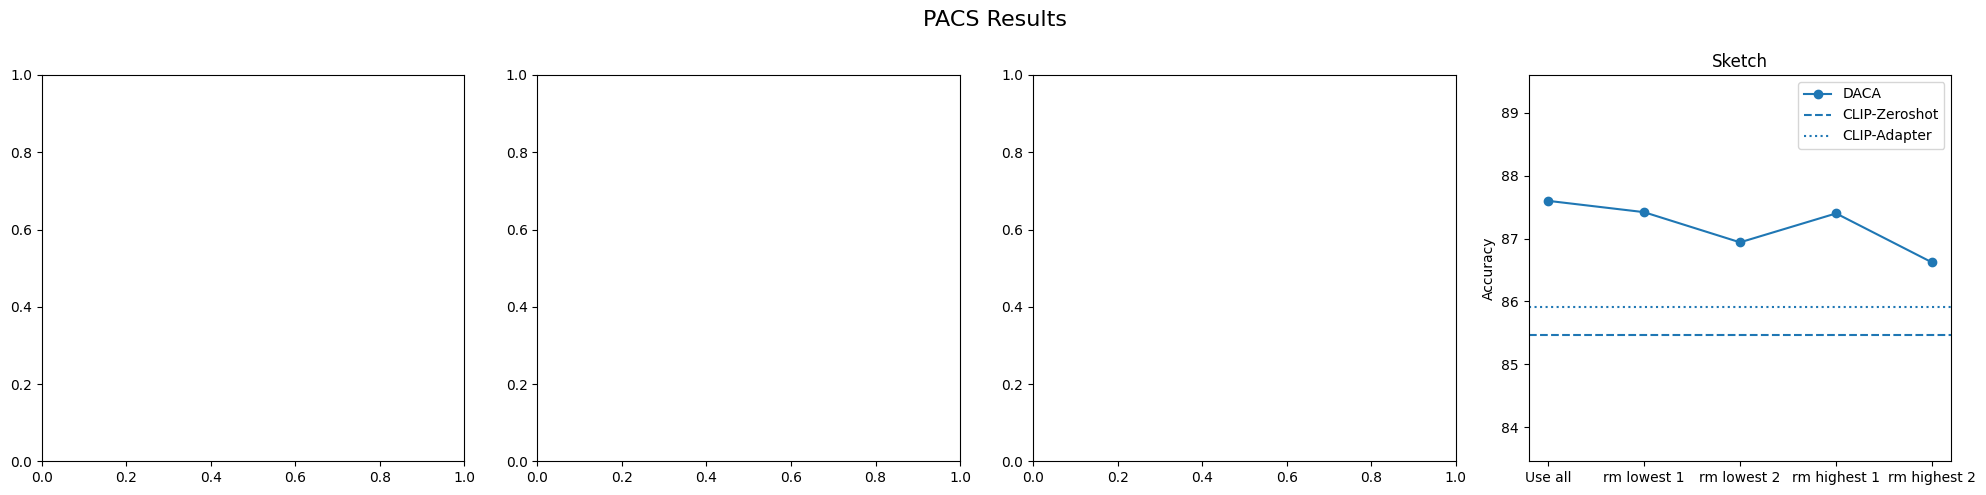

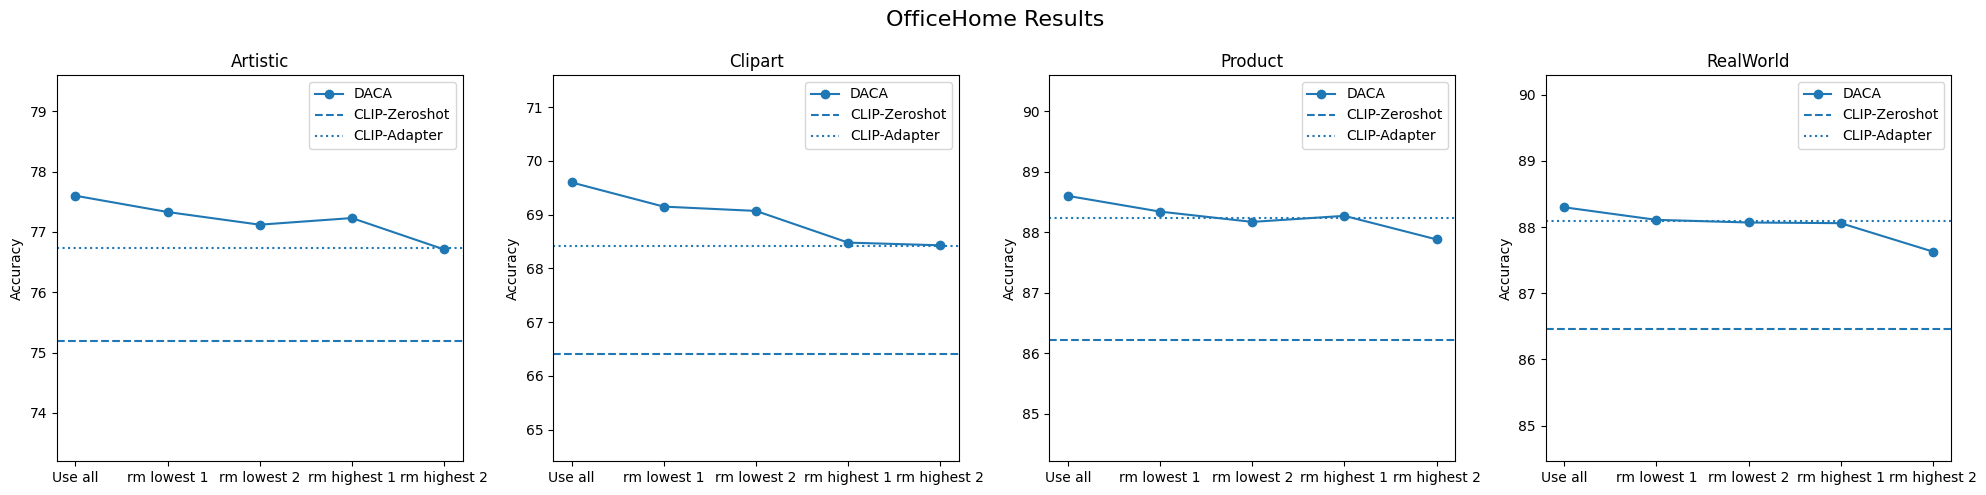

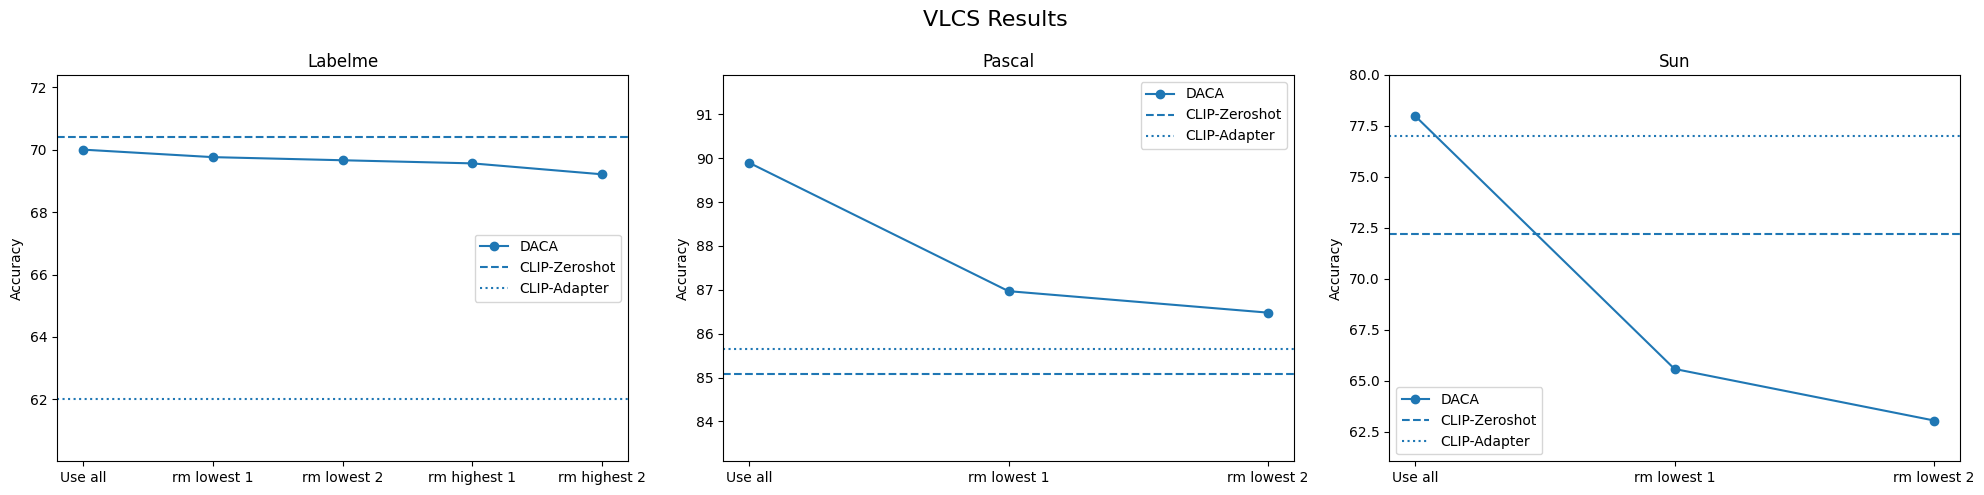

In [25]:
# Plot settings
configurations = ["Use all", "rm lowest 1", "rm lowest 2", "rm highest 1", "rm highest 2"]

# Plot function
def plot_results(data, baseline, dataset_name, configurations):
    fig, axes = plt.subplots(1, len(data[dataset_name]), figsize=(20, 5), sharey=False)
    fig.suptitle(f"{dataset_name} Results", fontsize=16)

    for ax, (domain, accuracies) in zip(axes, data[dataset_name].items()):
        if accuracies:  # Only plot if there are accuracies to plot
            ax.plot(configurations[:len(accuracies)], accuracies, marker='o', label='DACA')
            for method, value in baseline[dataset_name][domain].items():
                linestyle = '--' if method == "CLIP-Zeroshot" else ':'
                ax.axhline(y=value, linestyle=linestyle, label=method)
            ax.set_title(domain)
            # ax.set_xlabel("Configuration")
            ax.set_ylabel("Accuracy")
            ax.set_ylim(min(accuracies + [val for val in baseline[dataset_name][domain].values()]) - 2, 
                        max(accuracies + [val for val in baseline[dataset_name][domain].values()]) + 2)
            ax.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Plot results for each dataset
for dataset_name in data:
    plot_results(data, baseline, dataset_name, configurations)